<a href="https://colab.research.google.com/github/embarced/notebooks/blob/master/ml-apps/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering with DBSCAN

(C) https://www.embarc.de/

In [0]:
#@title
# Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

import numpy as np
from sklearn import datasets

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0], title=None, fname=None):
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # last color is black to properly display label -1 as noise (black)
    colors = np.append(np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1)))), ['#000000'])
    plt.figure(figsize=(10, 10))

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    if title:
      plt.title(title, fontdict={'fontsize': 25})
    if fname:
        plt.savefig(fname)

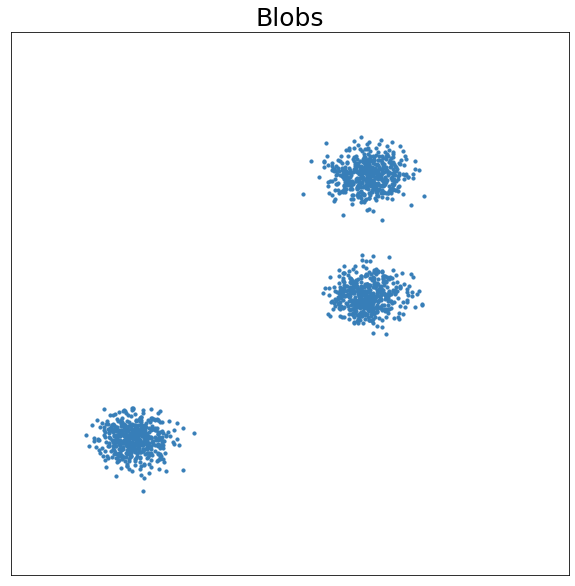

In [2]:
X, y = blobs
plot_dataset(X, title='Blobs')

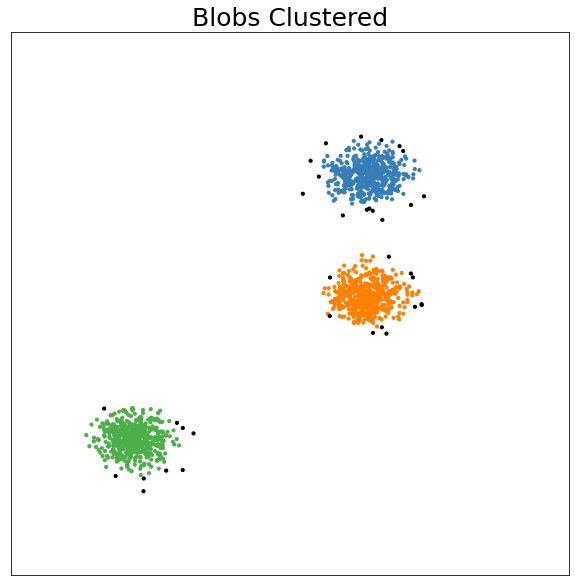

In [3]:
from sklearn.cluster import DBSCAN

clf = DBSCAN()
clf.fit(X)
y_pred = clf.labels_.astype(np.int)
plot_dataset(X, y_pred, title='Blobs Clustered')

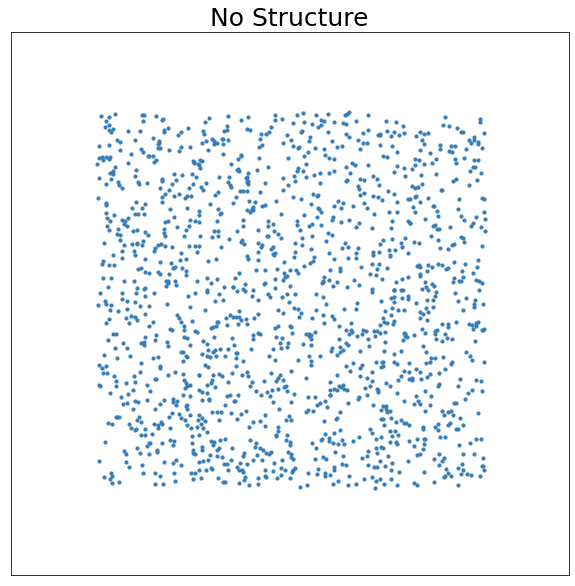

In [4]:
X, y = no_structure
plot_dataset(X, title='No Structure')

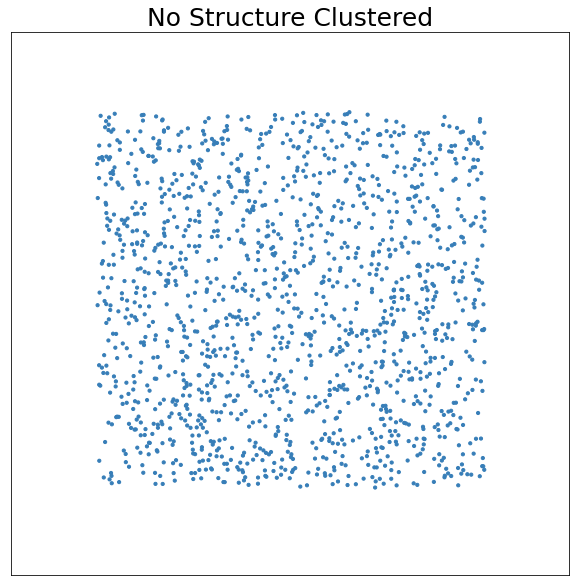

In [5]:
clf = DBSCAN()
clf.fit(X)
y_pred = clf.labels_.astype(np.int)
plot_dataset(X, y_pred, title='No Structure Clustered')

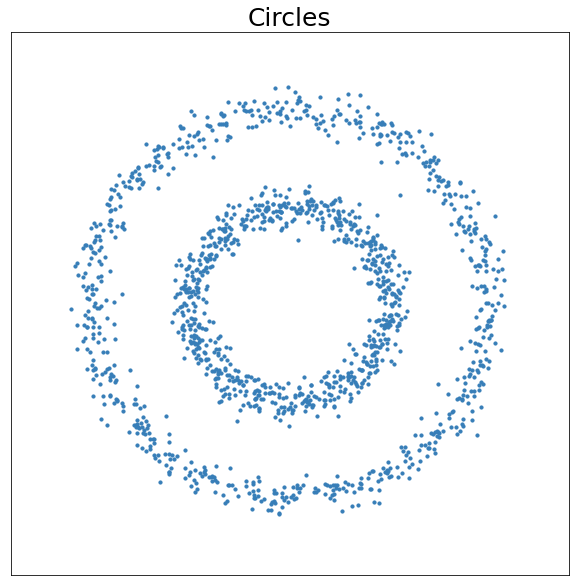

In [6]:
X, y = noisy_circles
plot_dataset(X, title='Circles')

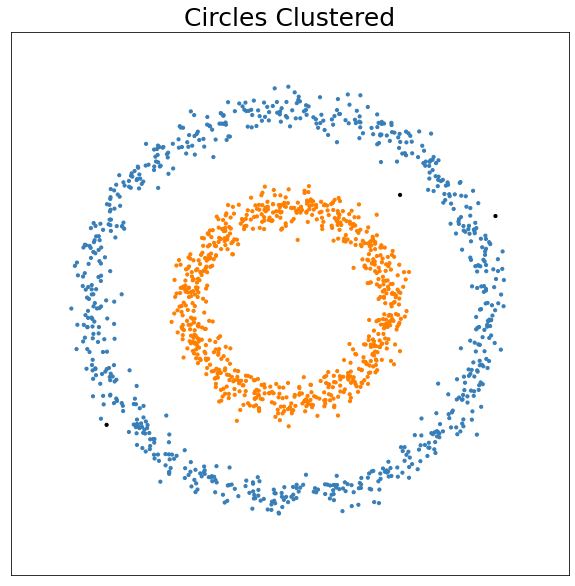

In [7]:
clf = DBSCAN(eps=0.1)
clf.fit(X)
y_pred = clf.labels_.astype(np.int)
plot_dataset(X, y_pred, title='Circles Clustered')